Configurações/bibliotecas


In [ ]:
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import sklearn.datasets as datasets
from scipy import stats
import sklearn
import sklearn.metrics as mt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score, roc_auc_score

In [ ]:
plt.rcParams["figure.figsize"]=(10,6)
plt.style.use("dark_background")

# Dataset

In [ ]:
x,y=datasets.make_moons(n_samples=500,noise=0.07)
print(f'{x.shape=}, {y.shape=} ')

x.shape=(500, 2), y.shape=(500,) 


In [ ]:
pd.DataFrame({'x_1': x[:,0], 'x_2':x[:,1], 'y':y})

,x_1,x_2,y
0,0.123221,0.014705,1
1,0.518266,-0.390142,1
2,0.696377,0.689791,0
3,1.343165,-0.393301,1
4,0.220260,0.913518,0
...,...,...,...
495,0.279871,0.877914,0
496,0.095882,0.218781,1
497,0.875315,0.316324,0
498,1.945335,0.448481,1


In [ ]:
unique=np.unique(y, return_counts=True)
for label, qt_label in zip(unique[0], unique[1]):
  print(f'Label: {label}\t Counts: {qt_label}')

Label: 0	 Counts: 250
Label: 1	 Counts: 250


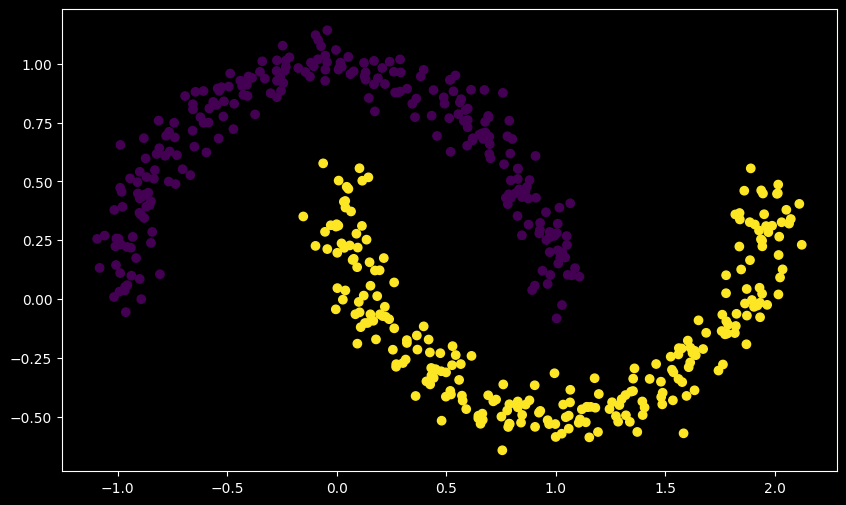

In [ ]:
plt.scatter(x[:,0],x[:,1], c=y)
plt.show()

# Dataset real


In [ ]:
dataset = pd.read_csv('https://raw.githubusercontent.com/franklinthony/dataset/master/titanic_disaster.csv', sep = ',')
dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
dataset.info()
dataset.shape
dataset.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


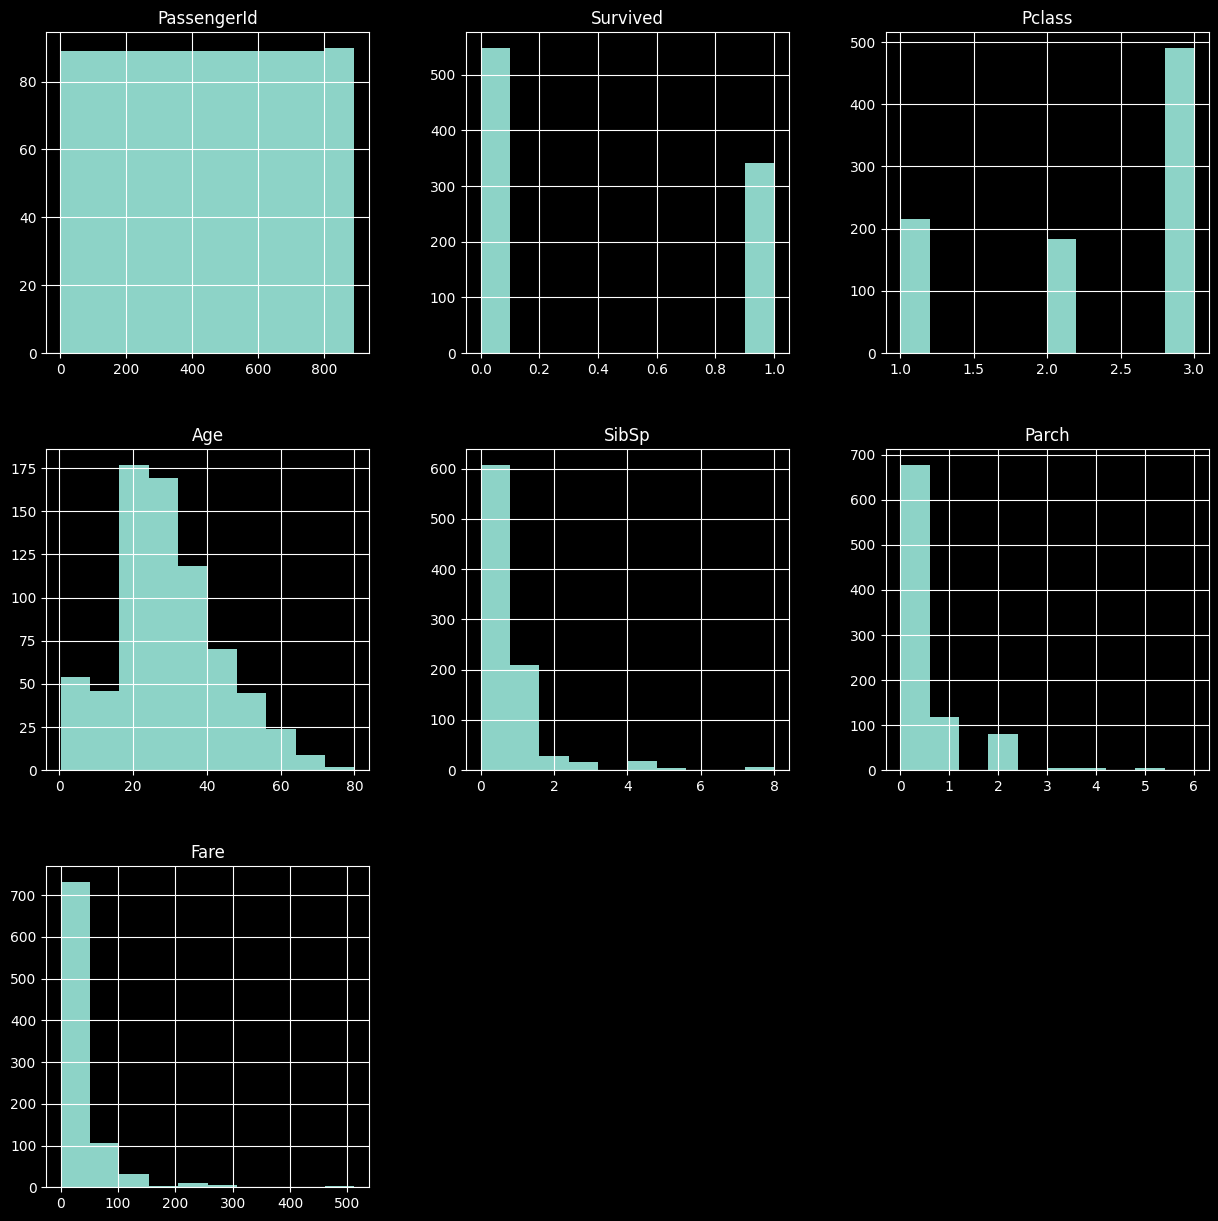

In [ ]:
dataset.hist(figsize=(15,15))
plt.show()

In [ ]:
dataset = pd.read_csv('https://raw.githubusercontent.com/franklinthony/dataset/master/titanic_disaster.csv', sep = ',')


dataset=dataset.drop("Cabin",axis=1).drop("Name",axis=1).drop("Ticket",axis=1).drop("PassengerId",axis=1).drop("Fare",axis=1)

#escolhi remover as linhas com os campos ainda nulos por que ainda teremos 712 instâncias para analisar
dataset=dataset.dropna()
dataset

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C
2,1,3,female,26.0,0,0,S
3,1,1,female,35.0,1,0,S
4,0,3,male,35.0,0,0,S
...,...,...,...,...,...,...,...
885,0,3,female,39.0,0,5,Q
886,0,2,male,27.0,0,0,S
887,1,1,female,19.0,0,0,S
889,1,1,male,26.0,0,0,C


In [ ]:
dataset['Sex']=LabelEncoder().fit_transform(dataset['Sex'])
dataset['Embarked']=LabelEncoder().fit_transform(dataset['Embarked'])
dataset


,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,1,22.0,1,0,2
1,1,1,0,38.0,1,0,0
2,1,3,0,26.0,0,0,2
3,1,1,0,35.0,1,0,2
4,0,3,1,35.0,0,0,2
...,...,...,...,...,...,...,...
885,0,3,0,39.0,0,5,1
886,0,2,1,27.0,0,0,2
887,1,1,0,19.0,0,0,2
889,1,1,1,26.0,0,0,0


In [ ]:
def classificar_idade(idade):
    if idade <= 17:
        return 0
    elif idade <= 50:
        return 1
    else:
        return 2


dataset['idade_categoria'] = dataset['Age'].apply(classificar_idade)
dataset

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,idade_categoria
0,0,3,1,22.0,1,0,2,1
1,1,1,0,38.0,1,0,0,1
2,1,3,0,26.0,0,0,2,1
3,1,1,0,35.0,1,0,2,1
4,0,3,1,35.0,0,0,2,1
...,...,...,...,...,...,...,...,...
885,0,3,0,39.0,0,5,1,1
886,0,2,1,27.0,0,0,2,1
887,1,1,0,19.0,0,0,2,1
889,1,1,1,26.0,0,0,0,1


# Modelo


In [ ]:
import numpy as np

class NnModel:
    def __init__(self, x: np.ndarray, y: np.ndarray, hidden_neurons: int = 10, output_neurons: int = 2):
        np.random.seed(8)

        self.x = x
        self.y = y
        self.input_neurons = x.shape[1]
        self.hidden_neurons = hidden_neurons
        self.output_neurons = output_neurons

        # Inicialização Xavier
        self.w1 = np.random.randn(self.input_neurons, hidden_neurons) / np.sqrt(self.input_neurons)
        self.b1 = np.zeros((1, hidden_neurons))
        self.w2 = np.random.randn(hidden_neurons, output_neurons) / np.sqrt(hidden_neurons)
        self.b2 = np.zeros((1, output_neurons))

        self.model_dict = {"w1": self.w1, "b1": self.b1, "w2": self.w2, "b2": self.b2}

        self.z1 = None
        self.f1 = None

    def forward(self, x: np.ndarray) -> np.ndarray:
        self.z1 = x.dot(self.w1) + self.b1
        self.f1 = np.tanh(self.z1)
        z2 = self.f1.dot(self.w2) + self.b2

        # Softmax com estabilidade numérica
        exp_values = np.exp(z2 - np.max(z2, axis=1, keepdims=True))
        softmax = exp_values / np.sum(exp_values, axis=1, keepdims=True)
        return softmax

    def loss(self, softmax: np.ndarray) -> float:
        #cross entropy
        m = self.y.shape[0]
        predictions = softmax[range(m), self.y]
        log_prob = -np.log(predictions + 1e-15)  # evita log(0)
        return np.mean(log_prob)

    def backpropagation(self, softmax: np.ndarray, learning_rate: float) -> None:
        m = self.x.shape[0]

        delta2 = softmax.copy()
        delta2[range(m), self.y] -= 1
        delta2 /= m  # média do gradiente

        dw2 = self.f1.T.dot(delta2)
        db2 = np.sum(delta2, axis=0, keepdims=True)

        delta1 = delta2.dot(self.w2.T) * (1 - np.tanh(self.z1) ** 2)
        dw1 = self.x.T.dot(delta1)
        db1 = np.sum(delta1, axis=0, keepdims=True)

        # Atualização dos pesos com gradiente descendente
        self.w1 -= learning_rate * dw1
        self.b1 -= learning_rate * db1
        self.w2 -= learning_rate * dw2
        self.b2 -= learning_rate * db2

    def fit(self, epochs: int, lr: float) -> None:
        for ep in range(1, epochs + 1):
            outputs = self.forward(self.x)
            loss_value = self.loss(outputs)
            self.backpropagation(outputs, lr)

            # Acurácia
            predictions = np.argmax(outputs, axis=1)
            accuracy = np.mean(predictions == self.y)

            if ep % max(1, epochs // 10) == 0:
                print(f"Epoch: [{ep}/{epochs}]   Accuracy: {accuracy:.3f}   Loss: {loss_value:.4f}")


teste random

In [ ]:
hn=30
on=20
lr=0.1
e=1000

model=NnModel(x,y,hn,on)
result=model.fit(e,lr)

Epoch: [100/1000]   Accuracy: 0.872   Loss: 0.3819
Epoch: [200/1000]   Accuracy: 0.888   Loss: 0.2725
Epoch: [300/1000]   Accuracy: 0.896   Loss: 0.2359
Epoch: [400/1000]   Accuracy: 0.920   Loss: 0.2079
Epoch: [500/1000]   Accuracy: 0.926   Loss: 0.1804
Epoch: [600/1000]   Accuracy: 0.944   Loss: 0.1542
Epoch: [700/1000]   Accuracy: 0.950   Loss: 0.1309
Epoch: [800/1000]   Accuracy: 0.962   Loss: 0.1114
Epoch: [900/1000]   Accuracy: 0.964   Loss: 0.0953
Epoch: [1000/1000]   Accuracy: 0.974   Loss: 0.0823


teste real


In [ ]:
y = dataset['Survived'].values
x = dataset.drop('Survived', axis=1).values

x = x.astype(np.float32)





In [ ]:

hn=200
on=5
lr=0.009
e=2000

model=NnModel(x,y,hn,on)
result=model.fit(e,lr)

Epoch: [200/2000]   Accuracy: 0.744   Loss: 0.5613
Epoch: [400/2000]   Accuracy: 0.785   Loss: 0.5104
Epoch: [600/2000]   Accuracy: 0.798   Loss: 0.4834
Epoch: [800/2000]   Accuracy: 0.805   Loss: 0.4664
Epoch: [1000/2000]   Accuracy: 0.809   Loss: 0.4544
Epoch: [1200/2000]   Accuracy: 0.808   Loss: 0.4708
Epoch: [1400/2000]   Accuracy: 0.813   Loss: 0.4662
Epoch: [1600/2000]   Accuracy: 0.817   Loss: 0.4619
Epoch: [1800/2000]   Accuracy: 0.824   Loss: 0.4576
Epoch: [2000/2000]   Accuracy: 0.826   Loss: 0.4534


In [ ]:
probs = model.forward(x)
pred = np.argmax(probs, axis=1)    # Classe prevista


probs_class_1 = probs[:, 1]

# AUC-ROC
auc_roc = roc_auc_score(y, probs_class_1)

# Acurácia
acc = accuracy_score(y, pred)

# F1-score
f1 = f1_score(y, pred)


print("=== Relatório de Classificação ===")
print(classification_report(y, pred))
print(f"AUC-ROC: {auc_roc:.4f}")
print(f"Acurácia: {acc:.4f}")
print(f"F1-score: {f1:.4f}")

=== Relatório de Classificação ===
              precision    recall  f1-score   support

           0       0.85      0.80      0.82       424
           1       0.73      0.78      0.76       288

    accuracy                           0.80       712
   macro avg       0.79      0.79      0.79       712
weighted avg       0.80      0.80      0.80       712

AUC-ROC: 0.8657
Acurácia: 0.7963
F1-score: 0.7571


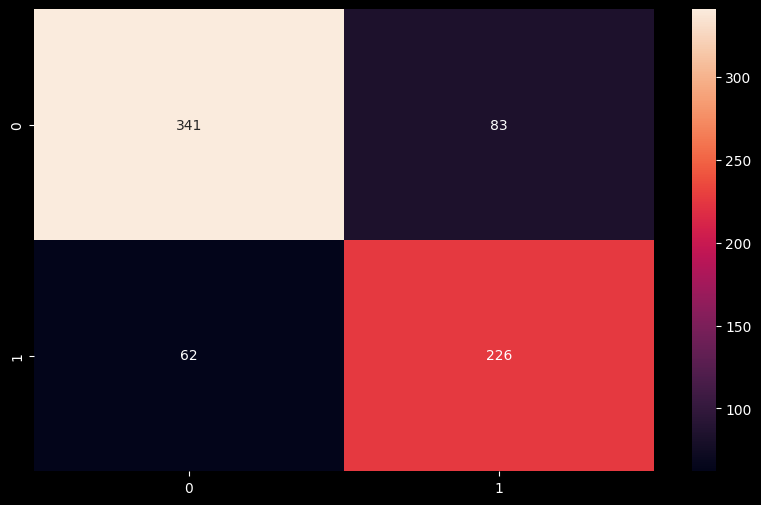

In [ ]:
cm=mt.confusion_matrix(y,pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix


=== Fold 1 ===
              precision    recall  f1-score   support

           0       0.79      0.89      0.84        85
           1       0.81      0.66      0.72        58

    accuracy                           0.80       143
   macro avg       0.80      0.77      0.78       143
weighted avg       0.80      0.80      0.79       143


=== Fold 2 ===
              precision    recall  f1-score   support

           0       0.79      0.87      0.83        85
           1       0.78      0.66      0.71        58

    accuracy                           0.78       143
   macro avg       0.78      0.76      0.77       143
weighted avg       0.78      0.78      0.78       143


=== Fold 3 ===
              precision    recall  f1-score   support

           0       0.71      0.81      0.76        85
           1       0.64      0.51      0.57        57

    accuracy                           0.69       142
   macro avg       0.68      0.66      0.66       142
weighted avg       0.68   

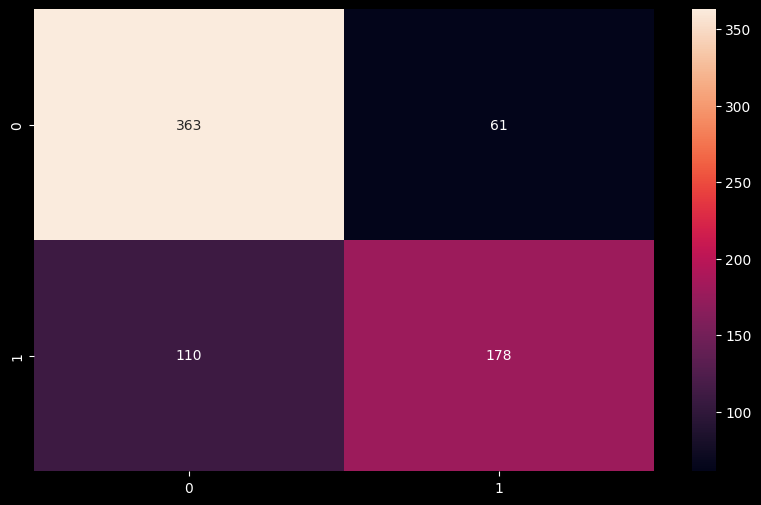

In [ ]:
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

accuracies = []
f1_scores = []
roc_aucs = []
y_true_all = []
y_pred_all = []


for i, (train_index, test_index) in enumerate(kf.split(x, y), start=1):
    X_train, X_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]

    #  KNN
    knn = KNeighborsClassifier(n_neighbors=5)
    knn.fit(X_train, y_train)

    # Previsões
    y_pred = knn.predict(X_test)
    y_proba = knn.predict_proba(X_test)[:, 1]  # Probabilidade para classe 1

    # Métricas
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_proba)

    accuracies.append(acc)
    f1_scores.append(f1)
    roc_aucs.append(auc)

    y_true_all.extend(y_test)
    y_pred_all.extend(y_pred)

    # Resultados
    print(f"\n=== Fold {i} ===")
    print(classification_report(y_test, y_pred))

# Resultados médios
print("\n=== MÉDIAS GERAIS ===")
print(f"Acurácia média: {np.mean(accuracies):.4f}")
print(f"F1-score médio: {np.mean(f1_scores):.4f}")
print(f"AUC ROC média: {np.mean(roc_aucs):.4f}")

# Matriz de confusão final
print("\n=== MATRIZ DE CONFUSÃO FINAL ===")

cm2=confusion_matrix(y_true_all, y_pred_all)
sns.heatmap(cm2, annot=True, fmt='d')
plt.show()
